Q3. (20 points) The Rulkov map is a simple dynamical systems model of neuronal action potentials. 
The model is a coupling of a fast and a slow dynamical system in the following form  
𝑥𝑛+1 = 𝑓(𝑥𝑛, 𝑦𝑛)  
𝑦𝑛+1 =   𝑦𝑛− 𝜇 (𝑥𝑛 +  1) +  𝜇𝜎  where f() is a discontinuous function of the form  
𝑓(𝑥, 𝑦) =   �
𝛼
1 −𝑥+ 𝑦,                  𝑥 ≤0
𝛼+ 𝑦,        0 < 𝑥 <  𝛼+ 𝑦
−1,                    𝑥  ≥ 𝛼+ 𝑦
  For some specific parameter choices, this system can reproduce the broad outlines of neuronal 
action potentials, viz. bursts of spikes, tonic spiking and periods of silence. I would like you to 
reproduce all three modes of behavior using this model. Hint: read the original paper for clues to 
appropriate parameter values.   https://journals.aps.org/pre/abstract/10.1103/PhysRevE.65.041922 I would also like you to empirically demonstrated ranges of parameter values that govern these 
three different regimes of activity for the neuron model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
def calculate_x(x_val, y_val, alpha_val, sigma_val):
    if x_val <= 0:
        return y_val + alpha_val / (1 - x_val)
    elif x_val >= (alpha_val + y_val):
        return -1
    else:
        return alpha_val + y_val

def calculate_y(x_val, y_val, alpha_val, sigma_val):
    return y_val - growth_rate * (x_val + 1) + growth_rate * sigma_val


In [3]:
growth_rate = 0.001
alpha_range = np.linspace(2, 8, 5, endpoint=True)
sigma_range = np.linspace(-1, 1, 5, endpoint=True)
iterations = 2000

for sigma_idx in range(len(sigma_range)):
    for alpha_idx in range(len(alpha_range)):
        x_values = np.zeros(iterations)
        y_values = np.zeros(iterations)
        y_values[0] = 1 - alpha_range[alpha_idx]  # Adjusted initial condition

        for step in range(iterations - 1):
            x_values[step + 1] = calculate_x(x_values[step], y_values[step], alpha_range[alpha_idx], sigma_range[sigma_idx])
            y_values[step + 1] = calculate_y(x_values[step], y_values[step], alpha_range[alpha_idx], sigma_range[sigma_idx])
        
        print(f"Sigma Index: {sigma_idx}, Alpha Index: {alpha_idx}")
        plt.plot(x_values, linewidth=0.3)
        plt.ylabel('x values')
        plt.xlabel('Iterations')
        plt.title(f"Alpha: {alpha_range[alpha_idx]}, Sigma: {sigma_range[sigma_idx]}")
        plt.savefig(f"Q3 Outputs/plot_{sigma_idx}_{alpha_idx}.png", dpi=200)
        plt.close()


Sigma Index: 0, Alpha Index: 0
Sigma Index: 0, Alpha Index: 1
Sigma Index: 0, Alpha Index: 2
Sigma Index: 0, Alpha Index: 3
Sigma Index: 0, Alpha Index: 4
Sigma Index: 1, Alpha Index: 0
Sigma Index: 1, Alpha Index: 1
Sigma Index: 1, Alpha Index: 2
Sigma Index: 1, Alpha Index: 3
Sigma Index: 1, Alpha Index: 4
Sigma Index: 2, Alpha Index: 0
Sigma Index: 2, Alpha Index: 1
Sigma Index: 2, Alpha Index: 2
Sigma Index: 2, Alpha Index: 3
Sigma Index: 2, Alpha Index: 4
Sigma Index: 3, Alpha Index: 0
Sigma Index: 3, Alpha Index: 1
Sigma Index: 3, Alpha Index: 2
Sigma Index: 3, Alpha Index: 3
Sigma Index: 3, Alpha Index: 4
Sigma Index: 4, Alpha Index: 0
Sigma Index: 4, Alpha Index: 1
Sigma Index: 4, Alpha Index: 2
Sigma Index: 4, Alpha Index: 3
Sigma Index: 4, Alpha Index: 4


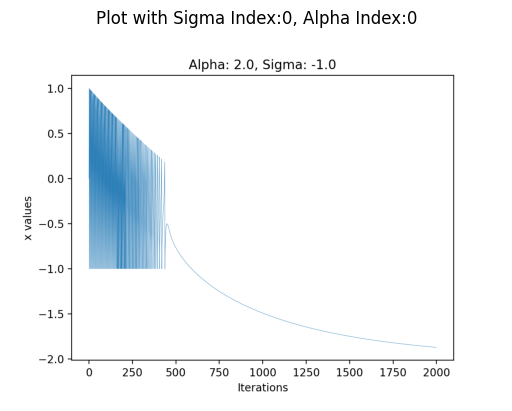

In [4]:
img = mpimg.imread("Q3 Outputs/plot_0_0.png")
plt.title("Plot with Sigma Index:0, Alpha Index:0")
plt.imshow(img)
plt.axis('off')
plt.show()

## Some Observations
The parameters alpha and sigma were varied, with alpha ranging from 2 to 8 and sigma from -1 to 1.

1. When sigma was -1 and -0.89, the models consistently exhibited silence behavior.
2. At sigma = -0.79 and alpha = 8, the model transitioned to a burst type, while remaining in silence mode for other values of alpha.
3. As sigma increased, burst-type behavior emerged at higher alpha values, while lower alphas maintained silence behavior.
4. For negative sigma values, only burst and silence models were observed. At sigma = -0.05, models with alpha values of 5, 6.5, and 8 showed burst behavior, whereas alpha values of 3.5 and 2 resulted in silence.
5. At sigma = 0.26, all three types of models were identified, depending on the value of alpha:
    
    5.1 For alpha = 2, the model was silence type.
    
    5.2 For alpha = 3.5, it exhibited tonic behavior.
    
    5.3 For alpha > 3.5, it was burst type.
6. As sigma exceeded 0.58, the silence model disappeared, and tonic models became more frequent as alpha increased.
7. At sigma = 1, tonic behavior was the only type observed across all alpha values from 2 to 8.


## Conclusions

1. Silence behavior predominantly occurs in the region of negative sigma, particularly at lower alpha values.
2. Tonic behavior tends to appear in positive sigma regions, with alpha values centered around 4.25 (derived from an average of 3.5/2 and 5/2). As sigma increases, the range around this center broadens.
3. Burst behavior is typically found near sigma values close to zero, with alpha values greater than 4.25. As alpha increases, the sigma range where burst behavior occurs expands.